In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv", sep="\t")

# DATA CLEANING

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with most common value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Remove missing Pclass
df = df.dropna(subset=["Pclass"])



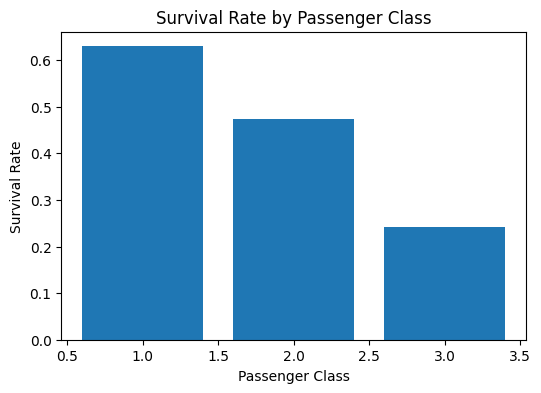

In [2]:
 #1. Survival by Passenger Class (Matplotlib Bar)

class_survival = df.groupby("Pclass")["Survived"].mean()
plt.figure(figsize=(6,4))
plt.bar(class_survival.index, class_survival.values)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()

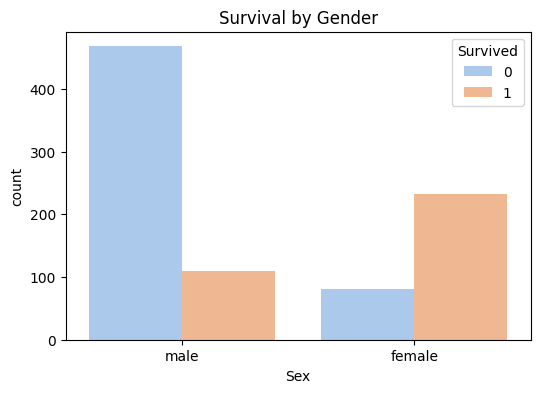

In [3]:
#2. Gender Survival (Seaborn Countplot)

plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="pastel", order=["male","female"])
plt.title("Survival by Gender")
plt.show()

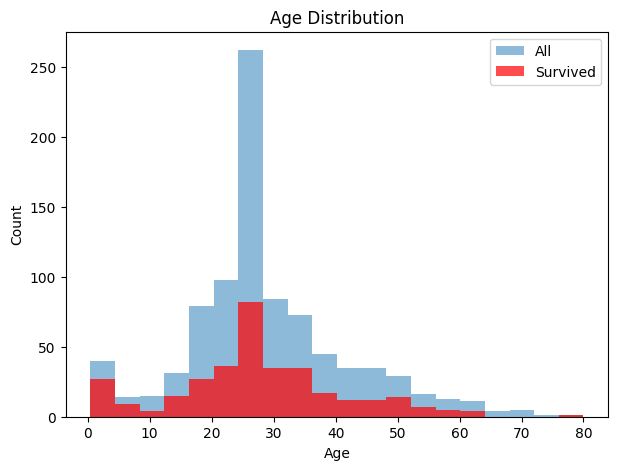

In [4]:
# 3. Age Distribution (Histogram)

plt.figure(figsize=(7,5))
plt.hist(df["Age"], bins=20, alpha=0.5, label="All")
plt.hist(df[df["Survived"]==1]["Age"], bins=20, alpha=0.7, color="red", label="Survived")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Age Distribution")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_14392\3303337975.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(x="Embarked", y="Survived", data=df, ci=68)


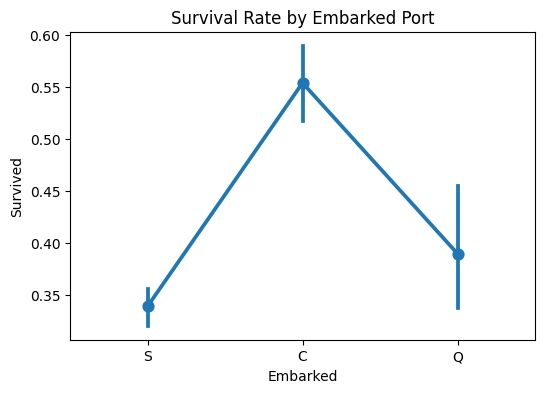

In [5]:
# 4. Embarked vs Survival (Pointplot)

plt.figure(figsize=(6,4))
sns.pointplot(x="Embarked", y="Survived", data=df, ci=68)
plt.title("Survival Rate by Embarked Port")
plt.show()

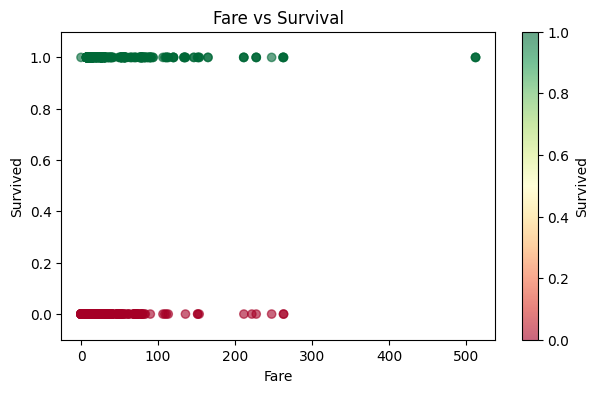

In [6]:
#5. Fare vs Survival (Scatter)

plt.figure(figsize=(7,4))
plt.scatter(df["Fare"], df["Survived"], c=df["Survived"], cmap="RdYlGn", alpha=0.6)
plt.colorbar(label="Survived")
plt.ylim(-0.1, 1.1)
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Fare vs Survival")
plt.show()

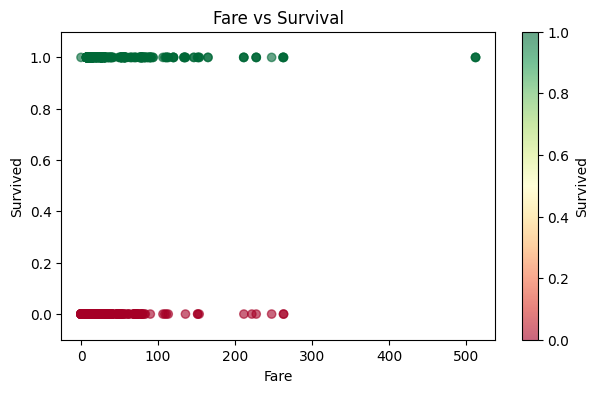

In [7]:
# 5. Fare vs Survival (Scatter)

plt.figure(figsize=(7,4))
plt.scatter(df["Fare"], df["Survived"], c=df["Survived"], cmap="RdYlGn", alpha=0.6)
plt.colorbar(label="Survived")
plt.ylim(-0.1, 1.1)
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Fare vs Survival")
plt.show()

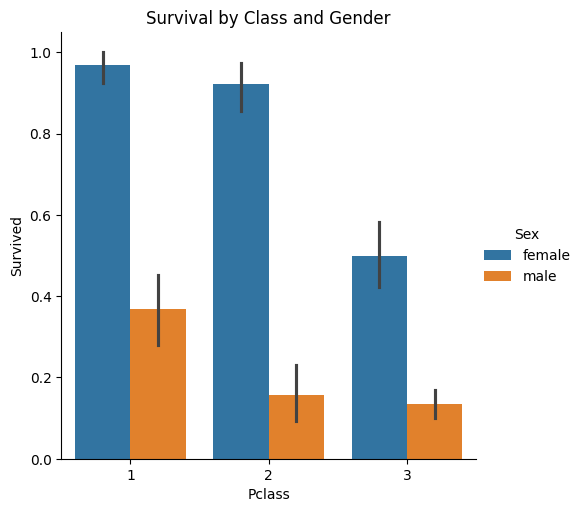

In [8]:
# 6. Cabin Class (Catplot)

sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=df)
plt.title("Survival by Class and Gender")
plt.show()

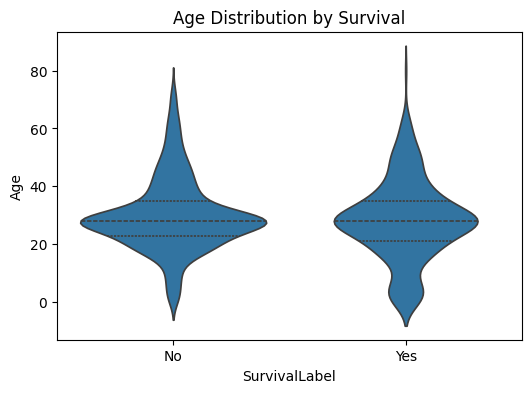

In [9]:
# 7. Age vs Survival (Violin Plot)

df["SurvivalLabel"] = df["Survived"].map({0:"No", 1:"Yes"})
plt.figure(figsize=(6,4))
sns.violinplot(x="SurvivalLabel", y="Age", data=df, inner="quartiles")
plt.title("Age Distribution by Survival")
plt.show()

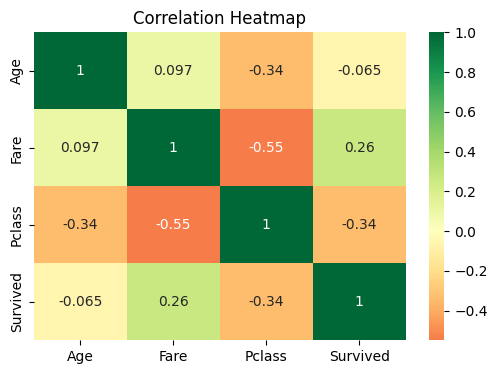

In [10]:
# 8. Correlation Heatmap

corr = df[["Age","Fare","Pclass","Survived"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="RdYlGn", center=0)
plt.title("Correlation Heatmap")
plt.show()

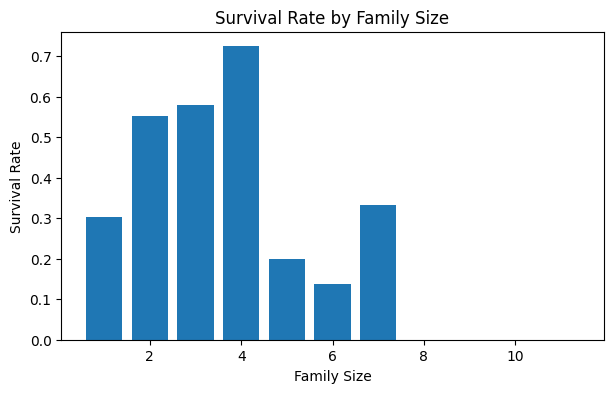

In [11]:
# 9. Family Size vs Survival (Grouped Bar)

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
family_survival = df.groupby("FamilySize")["Survived"].mean()
plt.figure(figsize=(7,4))
plt.bar(family_survival.index, family_survival.values)
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.show()